In [1]:
mc.cores = parallel::detectCores()
#rstan_options(auto_write = TRUE)

library(rethinking)

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: parallel
rethinking (Version 1.88)


In [2]:
set.seed(1914)
N <- 200 # num grant proposals
p <- 0.1 # proportion to select
# uncorrelated newsworthiness and trustworthiness
nw <- rnorm(N)
tw <- rnorm(N)
# select top 10% of combined scores
s <- nw + tw # total score
q <- quantile( s , 1-p ) # top 10% threshold
selected <- ifelse( s >= q , TRUE , FALSE )
cor( tw[selected] , nw[selected] )

[1] -0.7680083

In [3]:
N <- 100
set.seed(909)
height <- rnorm(N,10,2)
leg_prop <- runif(N,0.4,0.5)
leg_left <- leg_prop*height +
rnorm( N , 0 , 0.02 )
leg_right <- leg_prop*height +
rnorm( N , 0 , 0.02 )
# number of individuals
# sim total height of each
# leg as proportion of height
# sim left leg as proportion + error
# sim right leg as proportion + error
# combine into data frame
d <- data.frame(height,leg_left,leg_right)

In [4]:
head(d)

height,leg_left,leg_right
<dbl>,<dbl>,<dbl>
5.931417,2.679411,2.709286
6.512983,2.676428,2.680007
9.346628,3.927155,3.984947
9.233033,3.964191,3.993389
10.357128,4.427593,4.418766
10.088923,4.956641,4.971878


In [5]:
m6.1 <- quap(
            alist(
            height ~ dnorm( mu , sigma ) ,
            mu <- a + bl*leg_left + br*leg_right ,
            a ~ dnorm( 10 , 100 ) ,
            bl ~ dnorm( 2 , 10 ) ,
            br ~ dnorm( 2 , 10 ) ,
            sigma ~ dexp( 1 )
            ) ,
            data=d )

precis(m6.1)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.9812791,0.28395540,0.5274635,1.4350947
bl,0.2118585,2.52703706,-3.8268348,4.2505518
br,1.7836774,2.53125061,-2.2617500,5.8291047
sigma,0.6171026,0.04343427,0.5476862,0.6865189


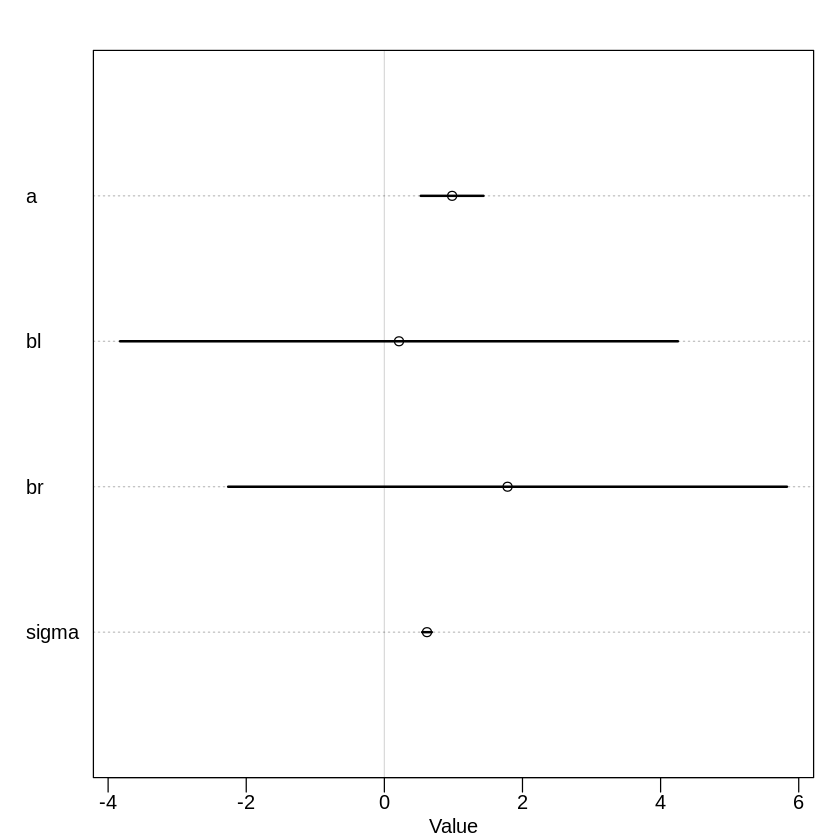

In [6]:
plot(precis(m6.1))

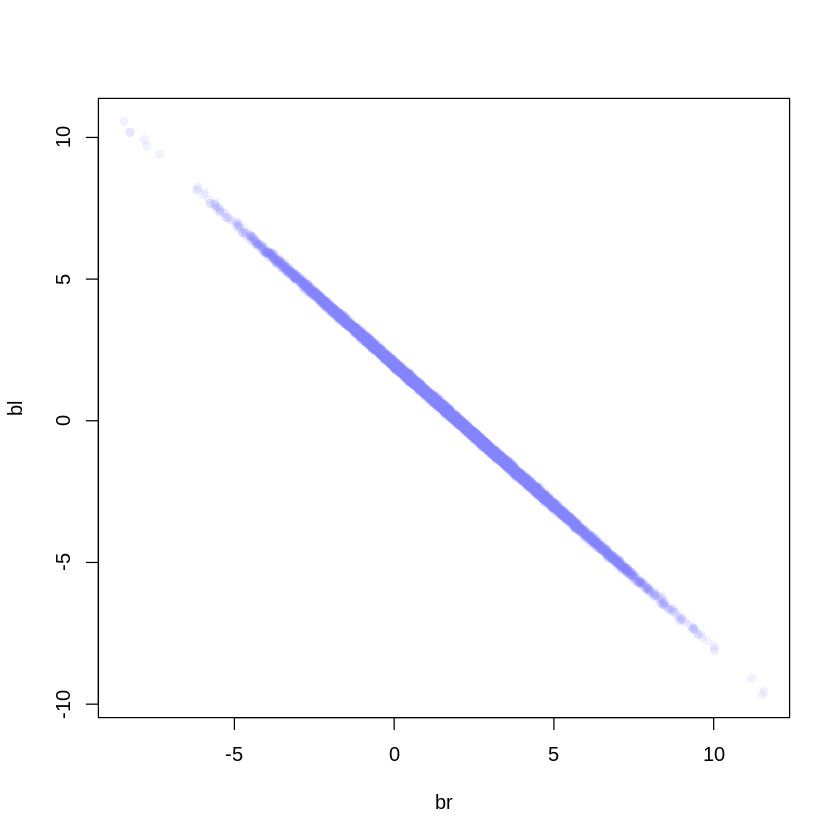

In [7]:
post <- extract.samples(m6.1)
plot( bl ~ br , post , col=col.alpha(rangi2,0.1) , pch=16 )

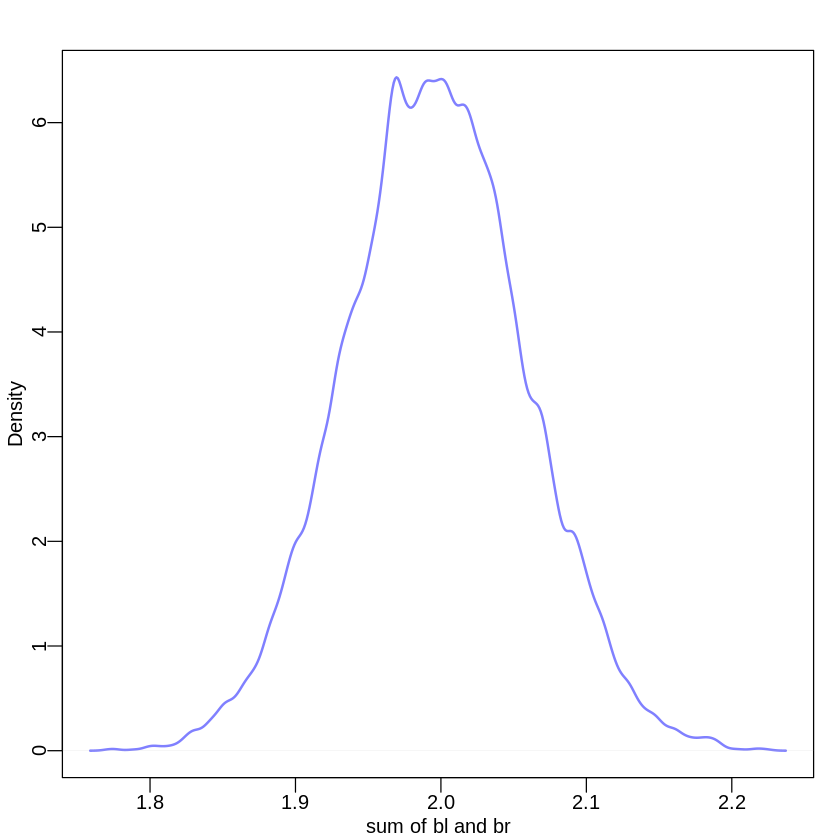

In [8]:
sum_blbr <- post$bl + post$br
dens( sum_blbr , col=rangi2 , lwd=2 , xlab="sum of bl and br" )

In [9]:
m6.2 <- quap(
alist(
height ~ dnorm( mu , sigma ) ,
mu <- a + bl*leg_left,
a ~ dnorm( 10 , 100 ) ,
bl ~ dnorm( 2 , 10 ) ,
sigma ~ dexp( 1 )
) ,
data=d )
precis(m6.2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.9979326,0.28364620,0.5446112,1.451254
bl,1.9920676,0.06115704,1.8943269,2.089808
sigma,0.6186038,0.04353998,0.5490185,0.688189


In [10]:
library(rethinking)
data(milk)
d <- milk
d$K <- scale( d$kcal.per.g )
d$F <- scale( d$perc.fat )
d$L <- scale( d$perc.lactose )

head(d)

clade,species,kcal.per.g,perc.fat,perc.protein,perc.lactose,mass,neocortex.perc,K,F,L
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
Strepsirrhine,Eulemur fulvus,0.49,16.60,15.42,67.98,1.95,55.16,-0.9400408,-1.2172427,1.3072619
Strepsirrhine,E macaco,0.51,19.27,16.91,63.82,2.09,NA,-0.8161263,-1.0303552,1.0112855
Strepsirrhine,E mongoz,0.46,14.11,16.85,69.04,2.51,NA,-1.1259125,-1.3915310,1.3826790
Strepsirrhine,E rubriventer,0.48,14.91,13.18,71.91,1.62,NA,-1.0019980,-1.3355347,1.5868743
Strepsirrhine,Lemur catta,0.60,27.28,19.50,53.22,2.19,NA,-0.2585112,-0.4696927,0.2571148
New World Monkey,Alouatta seniculus,0.47,21.22,23.58,55.20,5.25,64.54,-1.0639553,-0.8938643,0.3979882


In [11]:
# kcal.per.g regressed on perc.fat
m6.3 <- quap(
alist(
K ~ dnorm( mu , sigma ) ,
mu <- a + bF*F ,
a ~ dnorm( 0 , 0.2 ) ,
bF ~ dnorm( 0 , 0.5 ) ,
sigma ~ dexp( 1 )
) , data=d )

# kcal.per.g regressed on perc.lactose
m6.4 <- quap(
alist(
K ~ dnorm( mu , sigma ) ,
mu <- a + bL*L ,
a ~ dnorm( 0 , 0.2 ) ,
bL ~ dnorm( 0 , 0.5 ) ,
sigma ~ dexp( 1 )
) , data=d )

precis( m6.3 )
precis( m6.4 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,1.535526e-07,0.07725195,-0.1234634,0.1234637
bF,8.618970e-01,0.08426088,0.7272318,0.9965621
sigma,4.510179e-01,0.05870756,0.3571919,0.5448440


,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,7.438895e-07,0.06661633,-0.1064650,0.1064665
bL,-9.024550e-01,0.07132848,-1.0164517,-0.7884583
sigma,3.804653e-01,0.04958259,0.3012227,0.4597078


In [12]:
m6.5 <- quap(
alist(
K ~ dnorm( mu , sigma ) ,
mu <- a + bF*F + bL*L ,
a ~ dnorm( 0 , 0.2 ) ,
bF ~ dnorm( 0 , 0.5 ) ,
bL ~ dnorm( 0 , 0.5 ) ,
sigma ~ dexp( 1 )
) ,
data=d )

precis( m6.5 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-3.172136e-07,0.06603577,-0.10553823,0.1055376
bF,2.434983e-01,0.18357865,-0.04989579,0.5368925
bL,-6.780825e-01,0.18377670,-0.97179320,-0.3843719
sigma,3.767418e-01,0.04918394,0.29813637,0.4553472


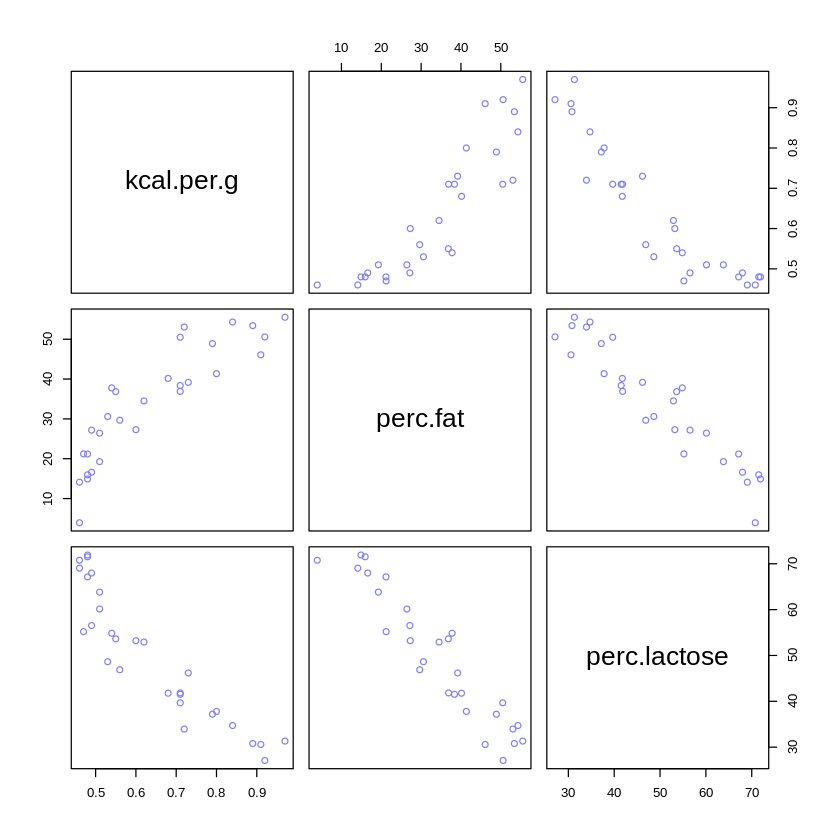

In [13]:
pairs( ~ kcal.per.g + perc.fat + perc.lactose , data=d , col=rangi2 )

In [14]:
cor( d$perc.fat , d$perc.lactose )

[1] -0.9416373

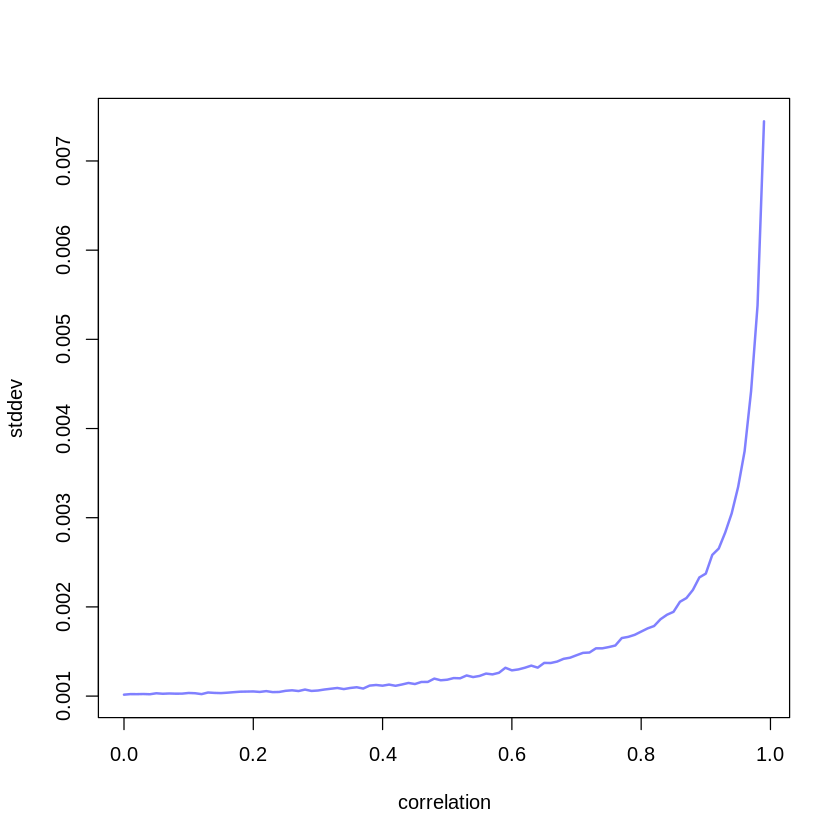

In [15]:
library(rethinking)

data(milk)
d <- milk

sim.coll <- function( r=0.9 ) {
    d$x <- rnorm( nrow(d) , mean=r*d$perc.fat , sd=sqrt( (1-r^2)*var(d$perc.fat) ) )
    m <- lm( kcal.per.g ~ perc.fat + x , data=d )
    sqrt( diag( vcov(m) ) )[2] # stddev of parameter
}

rep.sim.coll <- function( r=0.9 , n=100 ) {
    stddev <- replicate( n , sim.coll(r) )
    mean(stddev)
}

r.seq <- seq(from=0,to=0.99,by=0.01)
stddev <- sapply( r.seq , function(z) rep.sim.coll(r=z,n=100) )

plot( stddev ~ r.seq , type="l" , col=rangi2, lwd=2 , xlab="correlation" )

In [16]:
set.seed(71)
# number of plants
N <- 100
# simulate initial heights
h0 <- rnorm(N,10,2)
# assign treatments and simulate fungus and growth
treatment <- rep( 0:1 , each=N/2 )
fungus <- rbinom( N , size=1 , prob=0.5 - treatment*0.4 )
h1 <- h0 + rnorm(N, 5 - 3*fungus)
# compose a clean data frame
d <- data.frame( h0=h0 , h1=h1 , treatment=treatment , fungus=fungus )

In [17]:
head(d)

h0,h1,treatment,fungus
<dbl>,<dbl>,<int>,<int>
9.136316,14.34579,0,0
9.105626,15.62392,0,0
9.042855,14.38667,0,0
10.834291,15.83742,0,0
9.164199,11.46912,0,1
7.625672,11.10776,0,0


In [18]:
precis(d)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
h0,9.95978,2.1011623,6.570328,13.07874,▁▂▂▂▇▃▂▃▁▁▁▁
h1,14.39920,2.6880870,10.618002,17.93369,▁▁▃▇▇▇▁▁
treatment,0.50000,0.5025189,0.000000,1.00000,▇▁▁▁▁▁▁▁▁▇
fungus,0.23000,0.4229526,0.000000,1.00000,▇▁▁▁▁▁▁▁▁▂


In [19]:
sim_p <- rlnorm( 1e4 , 0 , 0.25 )
precis( data.frame(sim_p) )

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
sim_p,1.03699,0.2629894,0.670683,1.496397,▁▁▃▇▇▃▁▁▁▁▁▁


In [20]:
m6.6 <- quap(
    alist(
    h1 ~ dnorm( mu , sigma ),
    mu <- h0*p,
    p ~ dlnorm( 0 , 0.25 ),
    sigma ~ dexp( 1 )
    ), data=d )

precis(m6.6)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
p,1.426626,0.01760992,1.398482,1.454770
sigma,1.793286,0.12517262,1.593236,1.993336


In [21]:
m6.7 <- quap(
    alist(
    h1 ~ dnorm( mu , sigma ),
    mu <- h0 * p,
    p <- a + bt*treatment + bf*fungus,
    a ~ dlnorm( 0 , 0.2 ) ,
    bt ~ dnorm( 0 , 0.5 ),
    bf ~ dnorm( 0 , 0.5 ),
    sigma ~ dexp( 1 )
    ), data=d )

precis(m6.7)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,1.481391468,0.02451069,1.44221865,1.52056429
bt,0.002412222,0.02986965,-0.04532525,0.05014969
bf,-0.266718915,0.03654772,-0.32512923,-0.20830860
sigma,1.408797442,0.09862070,1.25118251,1.56641237


In [22]:
m6.8 <- quap(
alist(
h1 ~ dnorm( mu , sigma ),
mu <- h0 * p,
p <- a + bt*treatment,
a ~ dlnorm( 0 , 0.2 ),
bt ~ dnorm( 0 , 0.5 ),
sigma ~ dexp( 1 )
), data=d )

precis(m6.8)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,1.38035767,0.02517554,1.34012229,1.4205931
bt,0.08499924,0.03429718,0.03018573,0.1398128
sigma,1.74631655,0.12191552,1.55147200,1.9411611


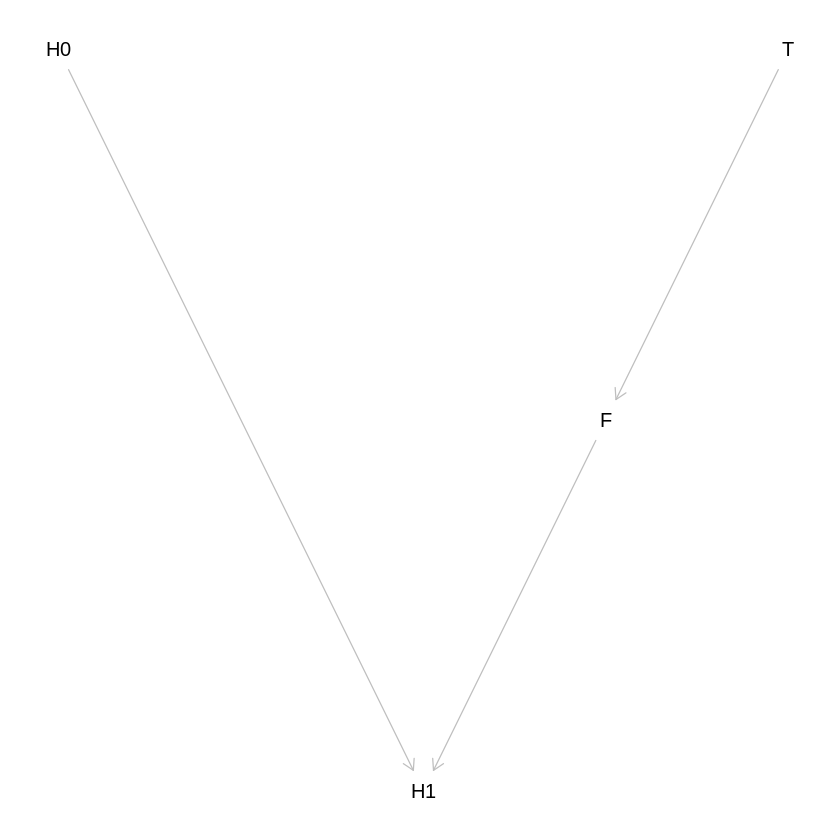

In [23]:
library(dagitty)

plant_dag <- dagitty( "dag {
H0 -> H1
F -> H1
T -> F
}")

coordinates( plant_dag ) <- list( x=c(H0=0,T=2,F=1.5,H1=1) , y=c(H0=0,T=0,F=1,H1=2) ) 

plot( plant_dag )

In [24]:
dseparated( plant_dag , "T" , "H1" )
dseparated( plant_dag , "T" , "H1" , "F" )

[1] FALSE

[1] TRUE

In [25]:
impliedConditionalIndependencies( plant_dag )

F _||_ H0
H0 _||_ T
H1 _||_ T | F

Code 6.22

In [1]:
library(rethinking)
d <- sim_happiness( seed=1977 , N_years=1000 )
precis(d)

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: parallel
rethinking (Version 1.88)


,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
age,3.300000e+01,18.768883,4.000000,62.000000,▇▇▇▇▇▇▇▇▇▇▇▇▇
married,3.007692e-01,0.458769,0.000000,1.000000,▇▁▁▁▁▁▁▁▁▃
happiness,-1.000070e-16,1.214421,-1.789474,1.789474,▇▅▇▅▅▇▅▇


In [27]:
d2 <- d[ d$age>17 , ] # only adults
d2$A <- ( d2$age - 18 ) / ( 65 - 18 )

In [28]:
d2$mid <- d2$married + 1

m6.9 <- quap(
    alist(
    happiness ~ dnorm( mu , sigma ),
    mu <- a[mid] + bA*A,
    a[mid] ~ dnorm( 0 , 1 ),
    bA ~ dnorm( 0 , 2 ),
    sigma ~ dexp(1)
    ) , data=d2 )

precis(m6.9,depth=2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],-0.2350877,0.06348986,-0.3365568,-0.1336186
a[2],1.2585517,0.08495989,1.1227694,1.3943340
bA,-0.7490274,0.11320112,-0.9299447,-0.5681102
sigma,0.9897080,0.02255800,0.9536559,1.0257600


In [29]:
m6.10 <- quap(
    alist(
    happiness ~ dnorm( mu , sigma ),
    mu <- a + bA*A,
    a ~ dnorm( 0 , 1 ),
    bA ~ dnorm( 0 , 2 ),
    sigma ~ dexp(1)
    ) , data=d2 )

precis(m6.10)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,1.649248e-07,0.07675015,-0.1226614,0.1226617
bA,-2.728620e-07,0.13225976,-0.2113769,0.2113764
sigma,1.213188e+00,0.02766080,1.1689803,1.2573949


In [30]:
N <- 200
b_GP <- 1
b_GC <- 0
b_PC <- 1
b_U <- 2

In [31]:
set.seed(1)
U <- 2*rbern( N , 0.5 ) - 1
G <- rnorm( N )
P <- rnorm( N , b_GP*G + b_U*U )
C <- rnorm( N , b_PC*P + b_GC*G + b_U*U )
d <- data.frame( C=C , P=P , G=G , U=U )

In [32]:
m6.11 <- quap(
    alist(
    C ~ dnorm( mu , sigma ),
    mu <- a + b_PC*P + b_GC*G,
    a ~ dnorm( 0 , 1 ),
    c(b_PC,b_GC) ~ dnorm( 0 , 1 ),
    sigma ~ dexp( 1 )
    ), data=d )

precis(m6.11)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.1174752,0.09919574,-0.2760091,0.04105877
b_PC,1.7868915,0.04455355,1.7156863,1.85809664
b_GC,-0.8389537,0.10614045,-1.0085867,-0.66932077
sigma,1.4094891,0.07011139,1.2974375,1.52154063


In [33]:
m6.12 <- quap(
alist(
C ~ dnorm( mu , sigma ),
mu <- a + b_PC*P + b_GC*G + b_U*U,
a ~ dnorm( 0 , 1 ),
c(b_PC,b_GC,b_U) ~ dnorm( 0 , 1 ),
sigma ~ dexp( 1 )
), data=d )

precis(m6.12)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.12197510,0.07192588,-0.2369265,-0.007023655
b_PC,1.01161103,0.06597258,0.9061741,1.117047948
b_GC,-0.04081373,0.09728716,-0.1962974,0.114669941
b_U,1.99648992,0.14770462,1.7604294,2.232550439
sigma,1.01959911,0.05080176,0.9384081,1.100790130


In [34]:
library(dagitty)
dag_6.1 <- dagitty( "dag {
X -> Y <- C
X <- U -> B
U <- A -> C
U -> B <- C
}")
adjustmentSets( dag_6.1 , exposure="X" , outcome="Y" )

 { C }
 { A }
 { U }

In [35]:
library(dagitty)
dag_6.2 <- dagitty( "dag {
S -> A -> D
S -> M -> D
S -> W -> D
A -> M
}")
adjustmentSets( dag_6.2 , exposure="W" , outcome="D" )

 { A, M }
 { S }

In [36]:
impliedConditionalIndependencies( dag_6.2 )

A _||_ W | S
D _||_ S | A, M, W
M _||_ W | S

Chapter 6 Practice

Question 6H1

In [37]:
data(WaffleDivorce)
d = WaffleDivorce
head(d)

Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage.SE,Divorce,Divorce.SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45
Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00
Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00
Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26
California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00
Colorado,CO,5.03,25.7,23.5,1.24,11.6,0.94,11,0,0,34277,0.00


From the book, page 185, "Note that what the do-operator gives you is not just the direct causal effect. It is
the total causal effect through all forward paths. To get a direct causal effect, you might have to close
more doors." Therefore, what we need to find the total causal influence of number of Waffle Houses on divorce rate is: Pr( Divorce Rate | do(Waffle Houses) )

We can use the DAG andthe code in the book on page 185 to find out which variables we need to control for:

In [38]:
library(dagitty)
dag_6.2 <- dagitty( "dag {
S -> A -> D
S -> M -> D
S -> W -> D
A -> M
}")
adjustmentSets( dag_6.2 , exposure="W" , outcome="D" )

 { A, M }
 { S }

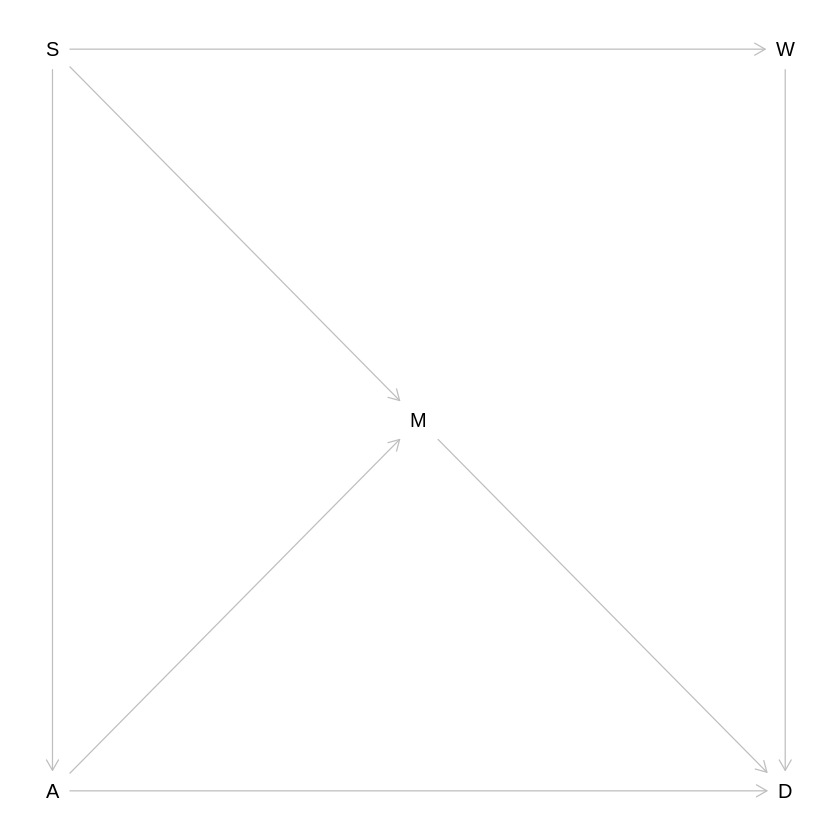

In [39]:
coordinates( dag_6.2 ) <- list( x=c(S=0,A=0,M=1,W=2,D=2) , y=c(S=0,A=2,M=1,W=0,D=2) ) 

plot( dag_6.2 )

So either we control for the state, or we control for A and M.  Let's check both:

In [40]:
d$D <- scale( d$Divorce )
d$W <- scale( d$WaffleHouses )
d$A <- scale( d$MedianAgeMarriage )
d$M <- scale( d$Marriage )
d$S <- scale( d$South )
#d$S <- 2*d$South - 1

head(d)

Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage.SE,Divorce,Divorce.SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860,D,W,A,M,S
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45,1.6542053,1.4540295,-0.6062895,0.02264406,1.587451
Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00,1.5443643,-0.4915672,-0.6866993,1.54980162,-0.617342
Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00,0.6107159,-0.2179676,-0.2042408,0.04897436,-0.617342
Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26,2.0935693,0.1316318,-1.4103870,1.65512283,1.587451
California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00,-0.9270579,-0.4915672,0.5998567,-0.26698927,-0.617342
Colorado,CO,5.03,25.7,23.5,1.24,11.6,0.94,11,0,0,34277,0.00,1.0500799,-0.3243674,-0.2846505,0.89154405,-0.617342


In [41]:
m6H1a <- quap(
    alist(
    D ~ dnorm( mu , sigma ),
    mu <- a + b_W*W + b_S*S,
    a ~ dnorm( 0 , 1 ),
    c(b_W,b_S) ~ dnorm( 0 , 1 ),
    sigma ~ dexp( 1 )
    ), data=d )

precis(m6H1a)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,2.738022e-06,0.12907377,-0.20628207,0.2062875
b_W,3.907041e-02,0.17657753,-0.24313459,0.3212754
b_S,3.129599e-01,0.17658316,0.03074592,0.5951739
sigma,9.203884e-01,0.09079812,0.77527548,1.0655013


In [42]:
m6H1b <- quap(
    alist(
    D ~ dnorm( mu , sigma ),
    mu <- a + b_W*W + b_A*A + b_M*M,
    a ~ dnorm( 0 , 1 ),
    c(b_W, b_A, b_M) ~ dnorm( 0 , 1 ),
    sigma ~ dexp( 1 )
    ), data=d )

precis(m6H1b)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,5.511250e-08,0.10742087,-0.17167925,0.1716794
b_W,1.802513e-01,0.10960808,0.00507644,0.3554262
b_A,-6.286113e-01,0.15621134,-0.87826720,-0.3789554
b_M,-8.345255e-02,0.15518354,-0.33146582,0.1645607
sigma,7.640011e-01,0.07555565,0.64324855,0.8847536


Model 'a' has coefficient b_W that is not significantly different from 0, demonstrating the lack of evidence for a causal influence between Waffle Houses on divorce rate, once the backdoor influence of State has been controlled for.  The alternate specification (model 'b') controlling for Age of Marriage and Marriage rate, which also block the backdoor paths between Waffle Houses and Divorce, show a very weak positive influence of W on D, with a credible interval at the 89% level that only just excludes the value of 0 for b_W.  

Question 6H2

DAG 6.2 implies the following conditional independencies:

In [43]:
impliedConditionalIndependencies( dag_6.2 )

A _||_ W | S
D _||_ S | A, M, W
M _||_ W | S

In [44]:
m6H2a <- quap(
    alist(
    A ~ dnorm( mu , sigma ),
    mu <- a + b_W*W + b_S*S,
    a ~ dnorm( 0 , 1 ),
    c(b_W, b_S) ~ dnorm( 0 , 1 ),
    sigma ~ dexp( 1 )
    ), data=d )

precis(m6H2a)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,5.473129e-07,0.13281112,-0.2122573,0.21225837
b_W,8.791736e-02,0.18154150,-0.2022210,0.37805574
b_S,-3.028331e-01,0.18154683,-0.5929800,-0.01268615
sigma,9.475101e-01,0.09344017,0.7981746,1.09684551


In [45]:
m6H2b <- quap(
    alist(
    D ~ dnorm( mu , sigma ),
    mu <- a + b_S*S + b_A*A + b_M*M + b_W*W,
    a ~ dnorm( 0 , 1 ),
    c(b_S, b_A, b_M, b_W) ~ dnorm( 0 , 1 ),
    sigma ~ dexp( 1 )
    ), data=d )

precis(m6H2b)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-3.126505e-06,0.10657787,-0.1703351,0.1703289
b_S,1.414221e-01,0.15139691,-0.1005394,0.3833836
b_A,-5.932765e-01,0.15962758,-0.8483922,-0.3381608
b_M,-6.724247e-02,0.15499197,-0.3149496,0.1804646
b_W,8.806615e-02,0.14685669,-0.1466392,0.3227715
sigma,7.579363e-01,0.07496085,0.6381344,0.8777382


In [46]:
m6H2c <- quap(
    alist(
    M ~ dnorm( mu , sigma ),
    mu <- a + b_W*W + b_S*S,
    a ~ dnorm( 0 , 1 ),
    c(b_W, b_S) ~ dnorm( 0 , 1 ),
    sigma ~ dexp( 1 )
    ), data=d )

precis(m6H2c)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-1.225441e-07,0.13678110,-0.2186027,0.2186025
b_W,-5.008723e-02,0.18678548,-0.3486065,0.2484321
b_S,1.139463e-01,0.18678621,-0.1845742,0.4124667
sigma,9.763650e-01,0.09623843,0.8225574,1.1301726


Chapter 7, section 7.5.1 discussion about model comparison of fungal treatment models m6.6, m6.7, m6.8.

R code 7.26

In [55]:
set.seed(11)
w <- WAIC( m6.7 )
w

[1] 361.4511
attr(,"lppd")
[1] -177.1724
attr(,"pWAIC")
[1] 3.553198
attr(,"se")
[1] 14.17033

In [56]:
attr(w,"lppd")

[1] -177.1724

In [57]:
attr(w,"pWAIC")

[1] 3.553198

In [59]:
attr(w,"se")

[1] 14.17033

In [63]:
set.seed(77)
compare( m6.6 , m6.7 , m6.8 )

,WAIC,pWAIC,dWAIC,weight,SE,dSE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m6.7,361.8901,3.839491,0.00000,1.000000e+00,14.26190,NA
m6.8,402.7757,2.645879,40.88562,1.323732e-09,11.28257,10.47837
m6.6,405.9139,1.581312,44.02380,2.756471e-10,11.64641,12.22582


In [64]:
set.seed(77)
compare( m6.6 , m6.7 , m6.8, func=LOO )

Warning message in xcheckLOOk(loo_list$diagnostics$pareto_k, object_name):
“Some Pareto k diagnostics are high (>0.5) in z.”

,LOO,pLOO,dLOO,weight,SE,dSE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m6.7,361.4752,3.573454,0.00000,1.000000e+00,14.19715,NA
m6.8,402.9708,2.759388,41.49561,9.757606e-10,11.34153,10.44425
m6.6,405.9343,1.591529,44.45910,2.217328e-10,11.70914,12.20141


In [86]:
set.seed(91)
waic_m6.7 <- WAIC( m6.7 , pointwise=TRUE )
waic_m6.8 <- WAIC( m6.8 , pointwise=TRUE )
n <- length(waic_m6.8)
diff_m6.7_m6.8 <- waic_m6.7 - waic_m6.8

In [87]:
sqrt(n*var(diff_m6.7_m6.8))

[1] 10.3581

In [88]:
40.0 + c(-1,1)*10.4*2.6

[1] 12.96 67.04

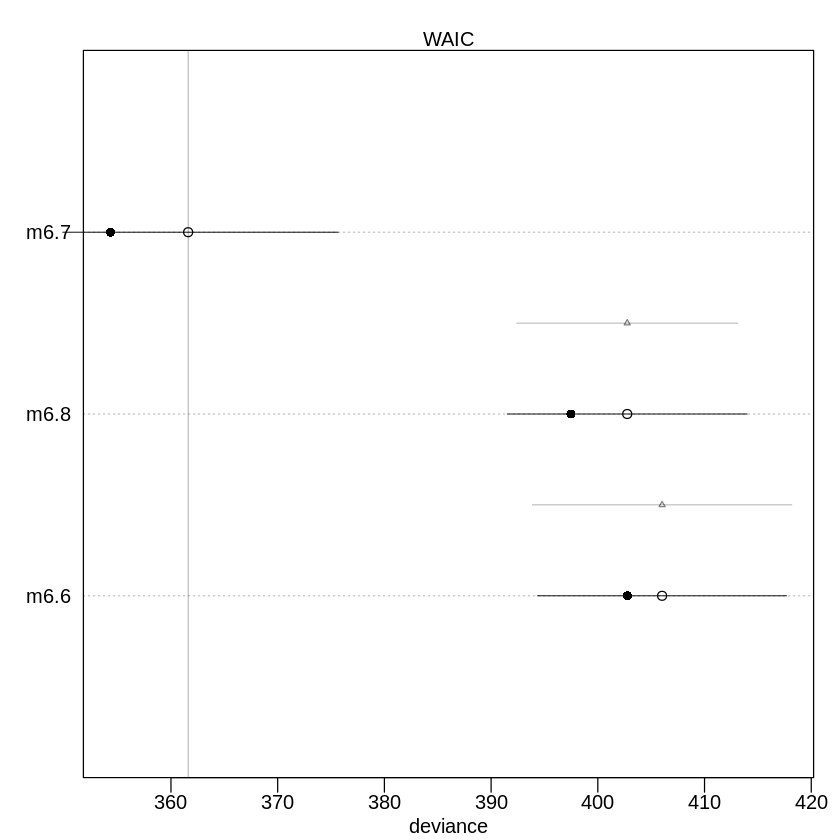

In [89]:
plot( compare( m6.6 , m6.7 , m6.8 ) )

In [90]:
set.seed(92)
waic_m6.6 <- WAIC( m6.6 , pointwise=TRUE )
diff_m6.6_m6.8 <- waic_m6.6 - waic_m6.8
sqrt( n*var( diff_m6.6_m6.8 ) )

[1] 4.854575

In [91]:
set.seed(93)
compare( m6.6 , m6.7 , m6.8 )@dSE

,m6.6,m6.7,m6.8
m6.6,NA,12.20191,4.930467
m6.7,12.201914,NA,10.426817
m6.8,4.930467,10.42682,NA
